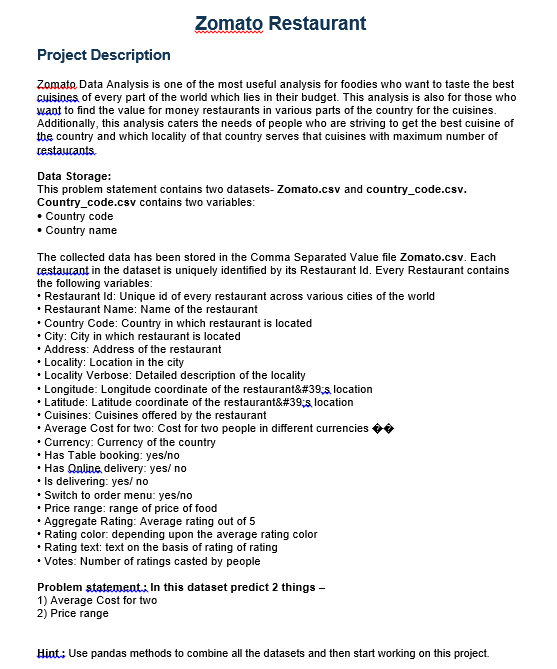
Dataset Link-  
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Z_Restaurant/Country-Code.xlsx
•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, classification_report, accuracy_score,confusion_matrix,mean_absolute_error,mean_squared_error,roc_auc_score


In [2]:

file_path = 'E:/D/Data Trained/Country-Code.xlsx'


data = pd.read_excel(file_path)
data

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [3]:
file_path = 'E:/D/Data Trained/zomato.csv'

# Read the CSV file
data1 = pd.read_csv(file_path, encoding='latin1')
data1


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
# Merge the dataframes on the 'Country Code' column
df = pd.merge(data1, data, on='Country Code', how='left')

In [5]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

Columns to Consider Dropping:
Restaurant ID: Unique identifier for each restaurant. Drop it as it does not provide useful information for prediction.

Restaurant Name: Specific to each restaurant and not useful for generalization. Drop it.

Address: Specific location information, not useful for prediction. Drop it.

Locality Verbose: Detailed locality information, often redundant if Locality is kept. Drop it.

Switch to order menu: This seems irrelevant to predicting cost or price range. Drop it.

Country Code: If you have Country, Country Code becomes redundant. Drop it.

Longitude: Geographic coordinate, which might not significantly influence the average cost or price range.

Latitude: Same reasoning as for Longitude

In [8]:
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality Verbose', 'Switch to order menu', 'Country Code', 'Longitude', 'Latitude']
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df

,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,ÛÁstanbul,Karakí_y,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,ÛÁstanbul,Koôuyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,ÛÁstanbul,Kuruí_eôme,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,ÛÁstanbul,Kuruí_eôme,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey


In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print('--'*20)

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64
----------------------------------------
Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Malviya Nagar                                   85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: count, Length: 1208, dtype: int64
------------------------------

In [10]:
df.describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  9551 non-null   object 
 1   Locality              9551 non-null   object 
 2   Cuisines              9542 non-null   object 
 3   Average Cost for two  9551 non-null   int64  
 4   Currency              9551 non-null   object 
 5   Has Table booking     9551 non-null   object 
 6   Has Online delivery   9551 non-null   object 
 7   Is delivering now     9551 non-null   object 
 8   Price range           9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
 10  Rating color          9551 non-null   object 
 11  Rating text           9551 non-null   object 
 12  Votes                 9551 non-null   int64  
 13  Country               9551 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1.0+ MB


In [12]:
df.isnull().sum()

City                    0
Locality                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

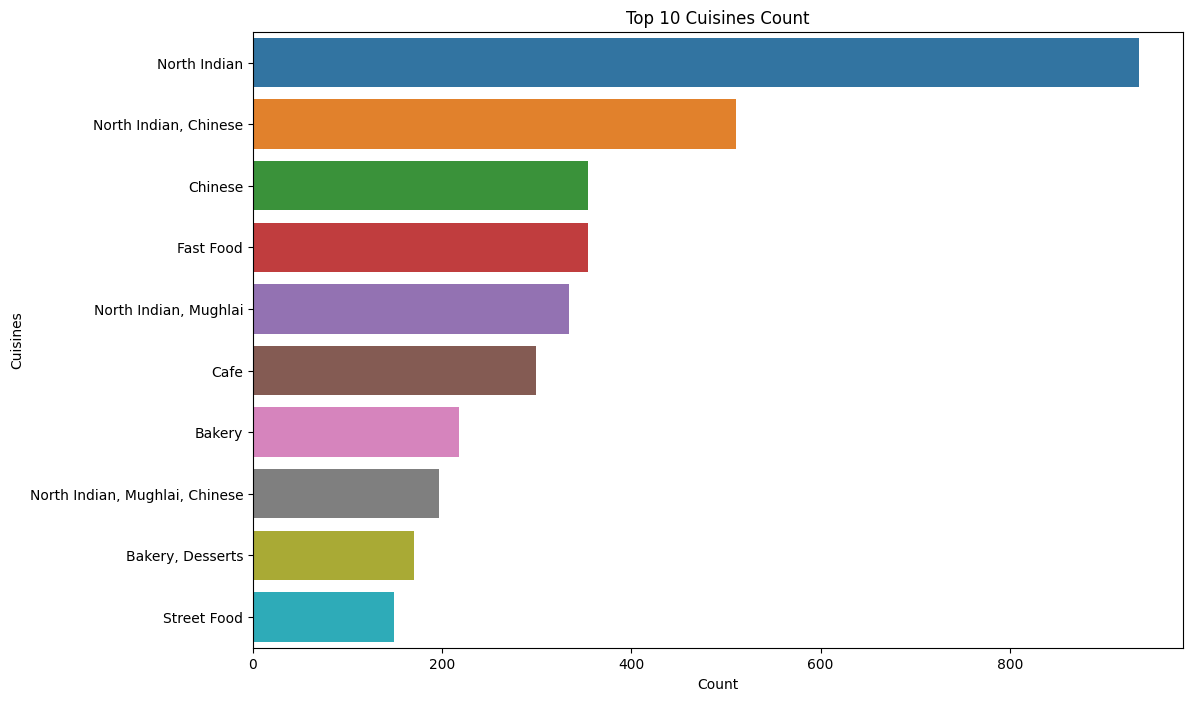

In [13]:
# Get the top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().nlargest(10).index

# Filter the dataframe to only include the top 10 cuisines
filtered_df = df[df['Cuisines'].isin(top_cuisines)]

# Plot the countplot
plt.figure(figsize=(12, 8))
sns.countplot(y='Cuisines', data=filtered_df, order=top_cuisines)
plt.title('Top 10 Cuisines Count')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.show()

In [14]:
# separating categorical and numerical column

num_col=[]
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('cat_col :-',cat_col)


print('num_col :-',num_col)

cat_col :- ['City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']
num_col :- ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [15]:
# Fill missing values in the 'Cuisines' column with the most common cuisine
most_common_cuisine = df['Cuisines'].mode()[0]
df['Cuisines'].fillna(most_common_cuisine, inplace=True)

In [16]:
df.isnull().sum()

City                    0
Locality                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

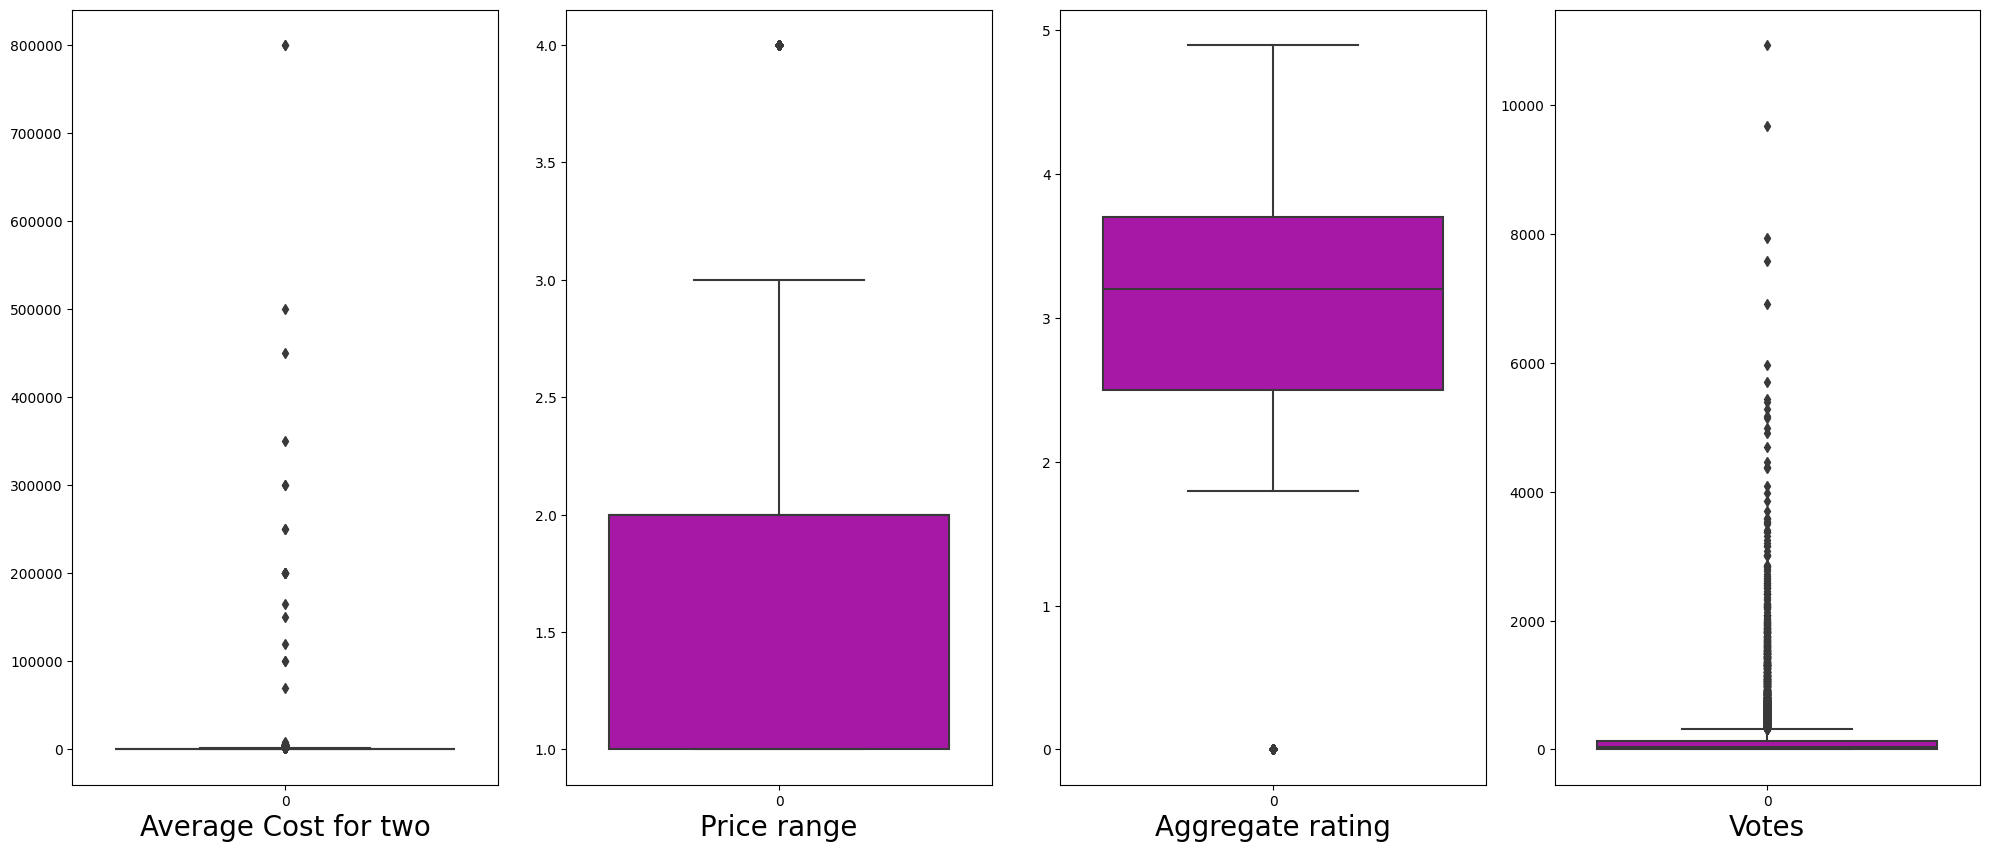

In [17]:
plt.figure(figsize=(20,25),facecolor='white')
p=1

for col in num_col:
    axs=plt.subplot(3,4,p)
    sns.boxplot(df[col],color='m')
    plt.xlabel(col,fontsize=20)
    p+=1
plt.tight_layout()

In [18]:
num_col

['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

In [ ]:
# need to remove outliars from Avg cost for two 

In [19]:
# Detect outliers in 'Average Cost for two'
Q1 = df['Average Cost for two'].quantile(0.25)
Q3 = df['Average Cost for two'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit)
print("--------------")
print(upper_limit)

-425.0
--------------
1375.0


In [20]:
# Filter out the outliers
df = df[(df['Average Cost for two'] >= lower_limit) & (df['Average Cost for two'] <= upper_limit)]

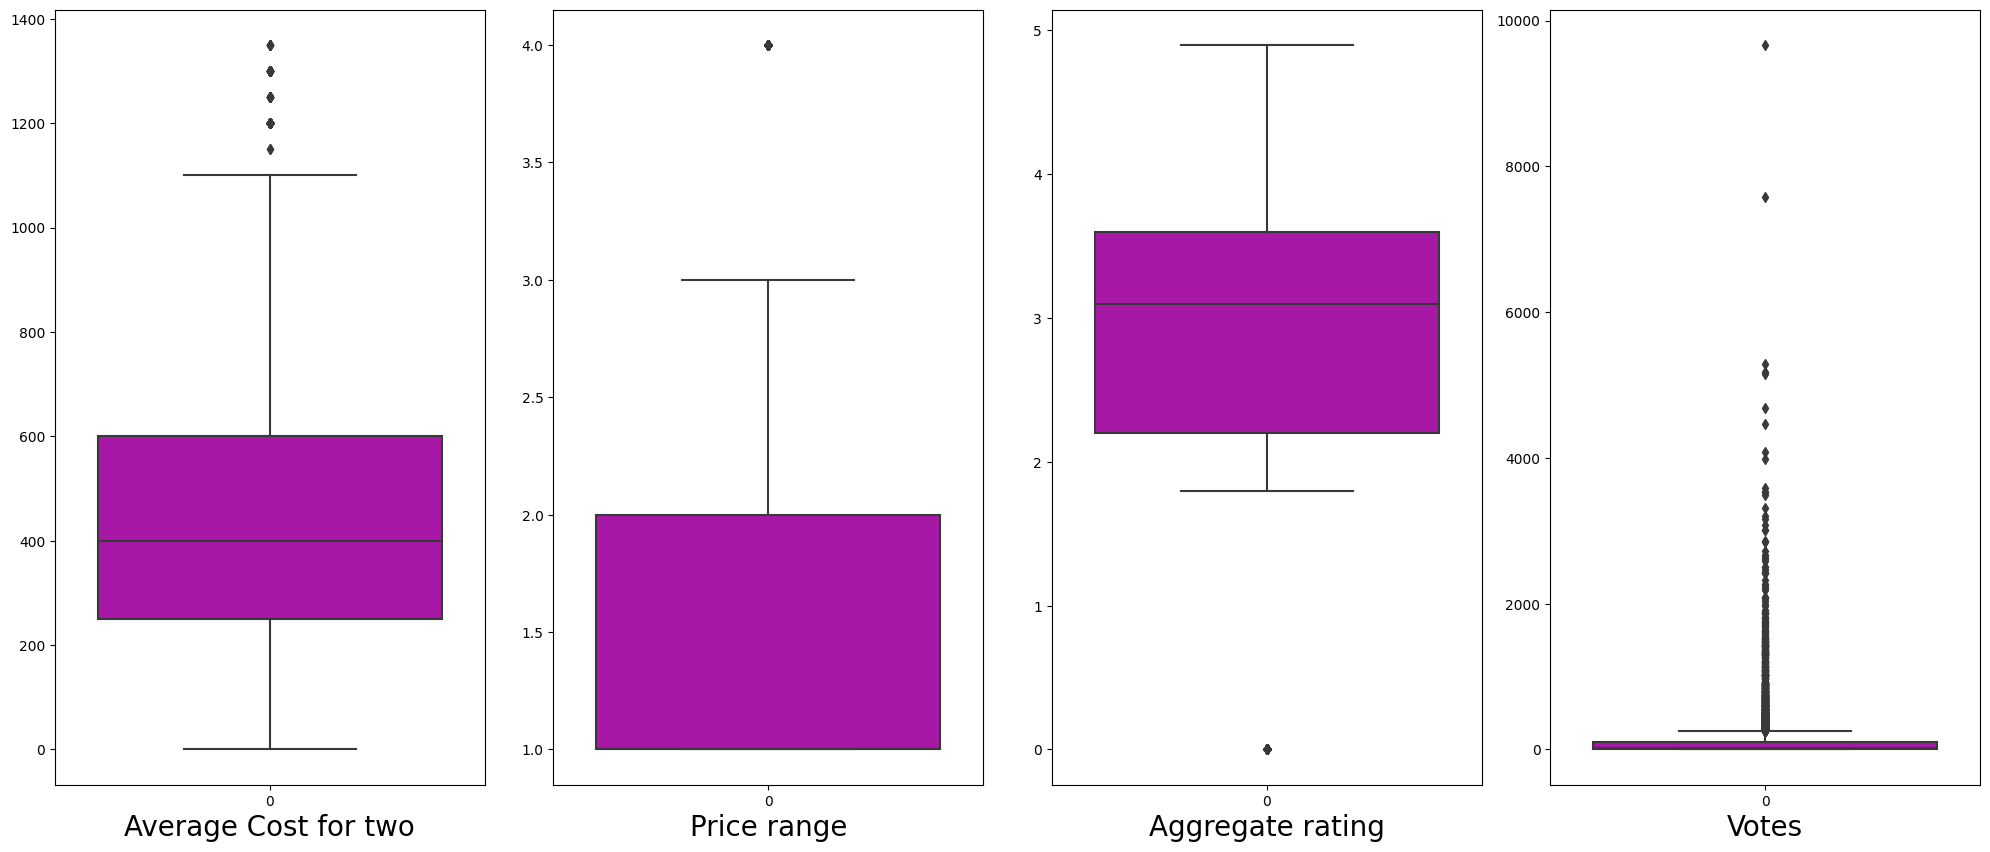

In [21]:
plt.figure(figsize=(20,25),facecolor='white')
p=1

for col in num_col:
    axs=plt.subplot(3,4,p)
    sns.boxplot(df[col],color='m')
    plt.xlabel(col,fontsize=20)
    p+=1
plt.tight_layout()

In [22]:
# Detect outliers in 'Average Cost for two'
Q1 = df['Votes'].quantile(0.25)
Q3 = df['Votes'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print("--------------")
print(upper_bound)

-144.5
--------------
251.5


In [23]:
# Filter out the outliers
df = df[(df['Votes'] >= lower_limit) & (df['Votes'] <= upper_limit)]

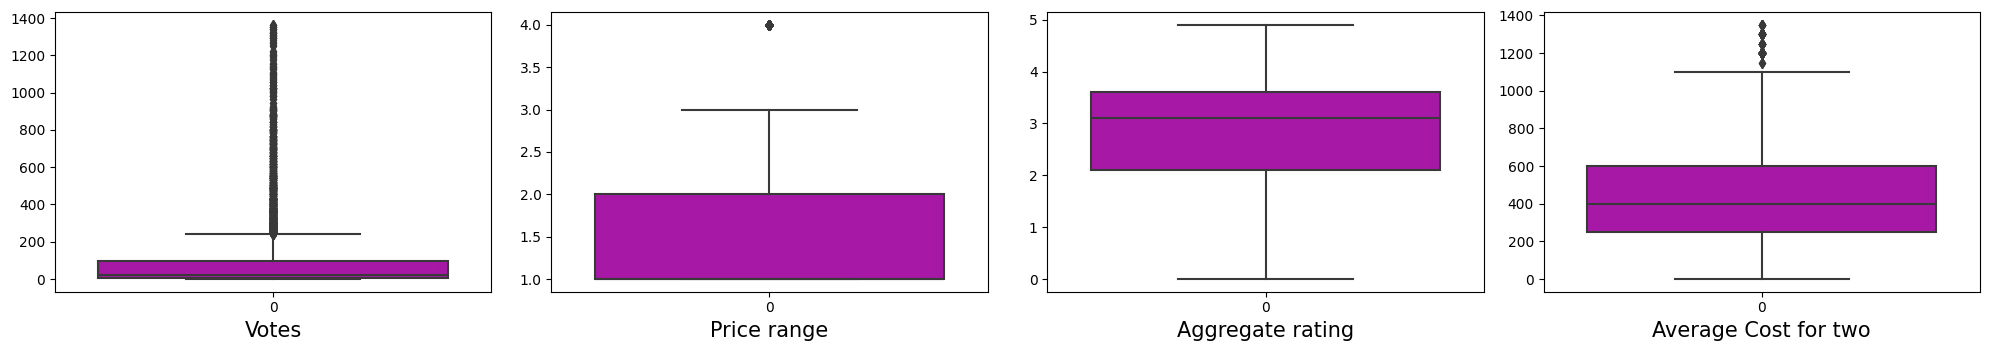

In [24]:
plt.figure(figsize=(20, 10), facecolor='white')
num_col = ['Votes', 'Price range', 'Aggregate rating', 'Average Cost for two']
p = 1

for col in num_col:
    ax = plt.subplot(3, 4, p)  # Adjust subplot layout to match the number of columns
    sns.boxplot(df[col],color='m')  
    plt.xlabel(col, fontsize=15)
    p += 1

plt.tight_layout()
plt.show()

In [25]:
df.skew(numeric_only=True)



Average Cost for two    0.832806
Price range             1.033675
Aggregate rating       -0.853725
Votes                   3.449828
dtype: float64

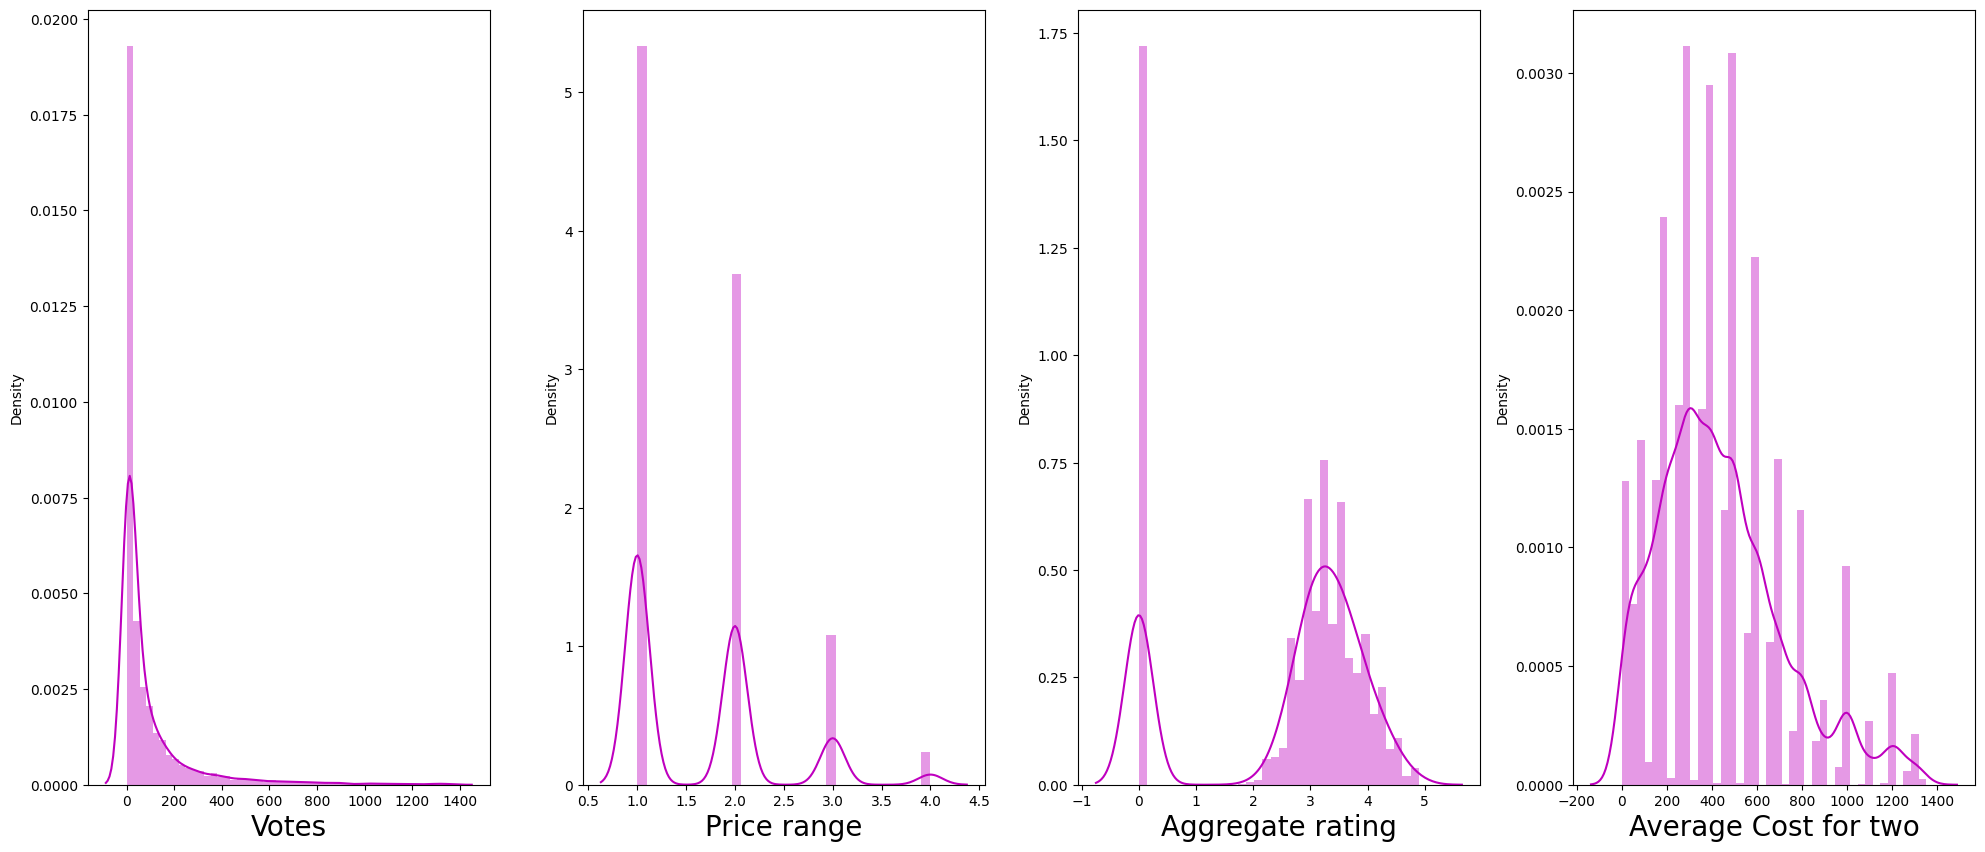

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
p=1

for col in num_col:
    axs=plt.subplot(3,4,p)
    sns.distplot(df[col],color='m')
    plt.xlabel(col,fontsize=20)
    p+=1
plt.tight_layout()

In [27]:
# Apply log transformation to 'Votes' and 'Price range' istarget so we will not apply on this column
df['Votes_log'] = np.log1p(df['Votes'])


# Recalculate skewness to see the effect
new_skewness = df['Votes_log'].skew()
print("New skewness after log transformation:")
print(new_skewness)

New skewness after log transformation:
-0.07053544820204624


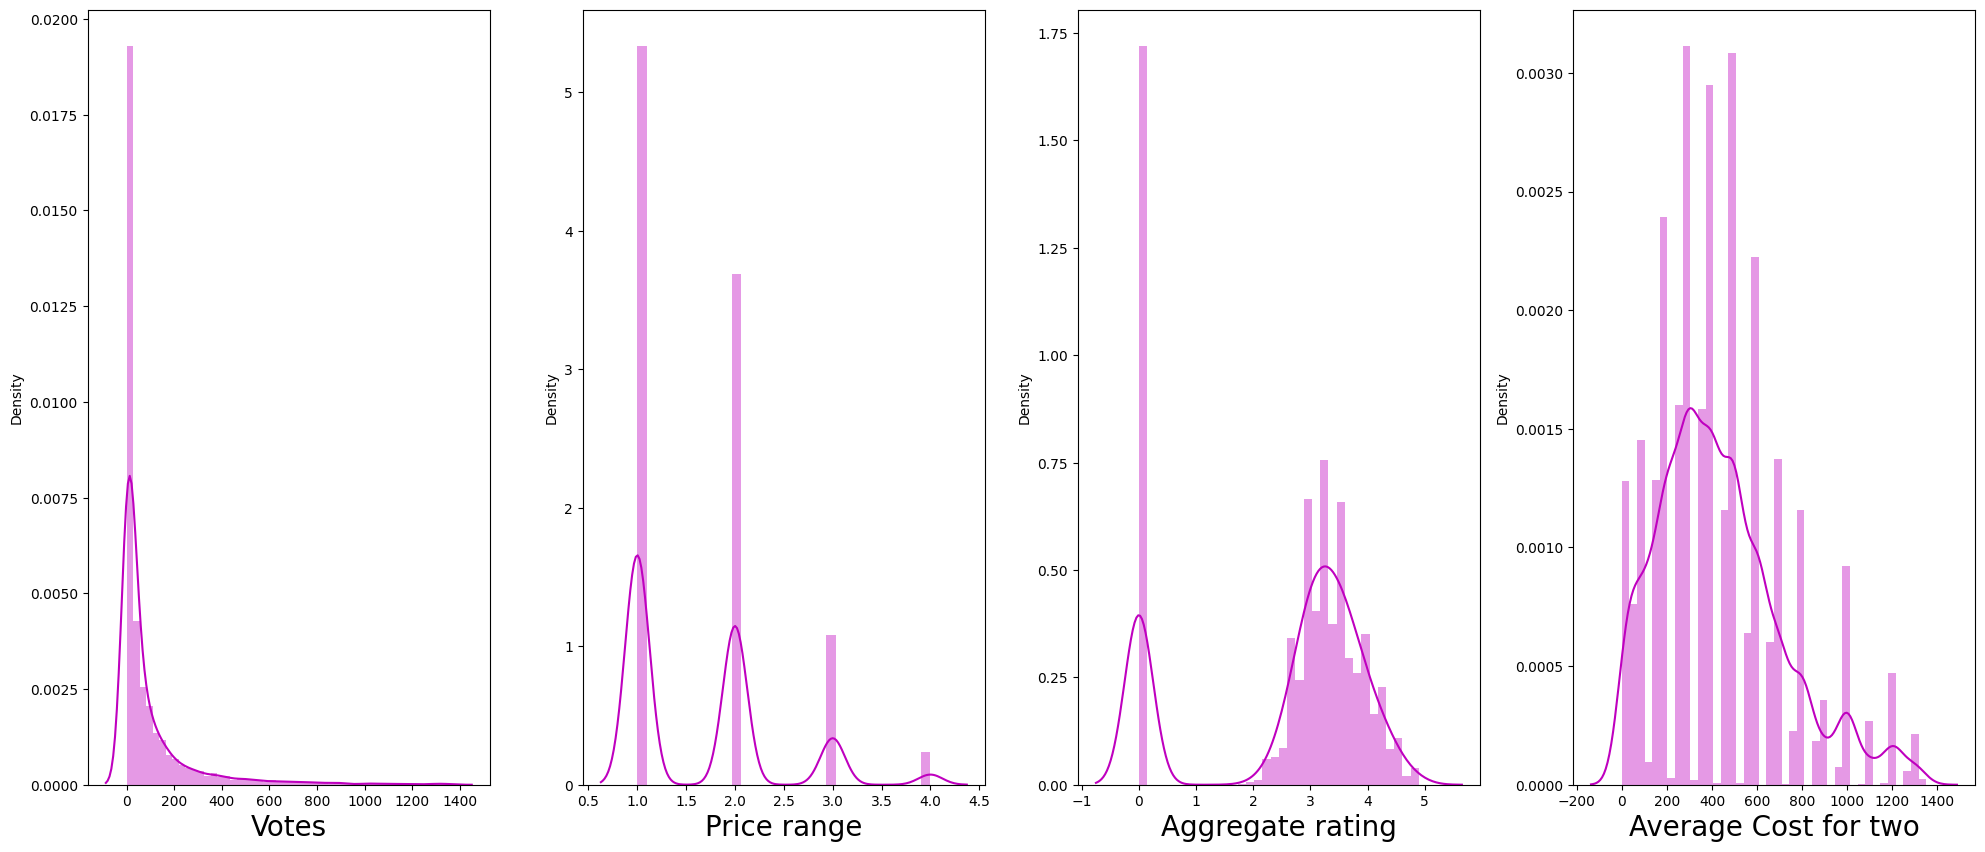

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
p=1

for col in num_col:
    axs=plt.subplot(3,4,p)
    sns.distplot(df[col],color='m')
    plt.xlabel(col,fontsize=20)
    p+=1
plt.tight_layout()

In [29]:
# Optionally, remove the original columns if no longer needed
df.drop(['Votes'], axis=1, inplace=True)


In [30]:
df

,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Country,Votes_log
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,Phillipines,5.752573
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,Phillipines,6.383507
5,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Chinese,1000,Botswana Pula(P),No,No,No,3,4.4,Green,Very Good,Phillipines,5.820083
9,Pasig City,Kapitolyo,Filipino,1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,Phillipines,6.278521
10,Pasig City,Kapitolyo,"Filipino, Mexican",800,Botswana Pula(P),No,No,No,3,4.9,Dark Green,Excellent,Phillipines,6.976348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,ÛÁstanbul,Karakí_y,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,Turkey,6.670766
9547,ÛÁstanbul,Koôuyolu,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,Turkey,6.942157
9548,ÛÁstanbul,Kuruí_eôme,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,Turkey,6.495266
9549,ÛÁstanbul,Kuruí_eôme,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,Turkey,6.804615


In [31]:
# separating categorical and numerical column

num_col=[]
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print('cat_col :-',cat_col)


print('num_col :-',num_col)

cat_col :- ['City', 'Locality', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Rating color', 'Rating text', 'Country']
num_col :- ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes_log']


In [126]:
# Standard scaller 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8599 entries, 0 to 9550
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  8599 non-null   object 
 1   Locality              8599 non-null   object 
 2   Cuisines              8599 non-null   object 
 3   Average Cost for two  8599 non-null   int64  
 4   Currency              8599 non-null   object 
 5   Has Table booking     8599 non-null   object 
 6   Has Online delivery   8599 non-null   object 
 7   Is delivering now     8599 non-null   object 
 8   Price range           8599 non-null   int64  
 9   Aggregate rating      8599 non-null   float64
 10  Rating color          8599 non-null   object 
 11  Rating text           8599 non-null   object 
 12  Country               8599 non-null   object 
 13  Votes_log             8599 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 1.2+ MB


In [33]:
df.head(3)

,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Country,Votes_log
0,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,Phillipines,5.752573
1,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,Phillipines,6.383507
5,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",Chinese,1000,Botswana Pula(P),No,No,No,3,4.4,Green,Very Good,Phillipines,5.820083


In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


# One-hot encoding categorical features
categorical_cols = ['City', 'Locality', 'Cuisines', 'Currency', 
                    'Has Table booking', 'Has Online delivery', 
                    'Is delivering now', 'Rating color', 'Rating text', 'Country']

# Use OneHotEncoder to transform categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Update this line
encoded_categorical = encoder.fit_transform(df[categorical_cols])

# Combine with numerical features
numerical_cols = ['Aggregate rating', 'Votes_log']
X = np.hstack((encoded_categorical, df[numerical_cols].values))

In [35]:
# Targets
y_cost = df['Average Cost for two']
y_price = df['Price range']

In [36]:
# Train-test split
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X, y_cost, test_size=0.2, random_state=42)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42)


In [37]:
# Feature scaling
scaler = StandardScaler()
X_train_cost = scaler.fit_transform(X_train_cost)
X_test_cost = scaler.transform(X_test_cost)

X_train_price = scaler.fit_transform(X_train_price)
X_test_price = scaler.transform(X_test_price)

In [ ]:
1. Predicting Average Cost for Two (Regression)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train_cost, y_train_cost)

# Make predictions
y_pred_cost = regressor.predict(X_test_cost)

# Evaluate the model
mse_cost = mean_squared_error(y_test_cost, y_pred_cost)
r2_cost = r2_score(y_test_cost, y_pred_cost)

print("Average Cost for Two Prediction")
print("Mean Squared Error:", mse_cost)
print("R-squared:", r2_cost)

Average Cost for Two Prediction
Mean Squared Error: 1.190334154744441e+32
R-squared: -1.59401828010026e+27


In [ ]:
2. Predicting Price Range (Classification)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
classifier = RandomForestClassifier(random_state=42)

# Train the model
classifier.fit(X_train_price, y_train_price)

# Make predictions
y_pred_price = classifier.predict(X_test_price)

# Evaluate the model
accuracy_price = accuracy_score(y_test_price, y_pred_price)
classification_rep = classification_report(y_test_price, y_pred_price)
confusion_mat = confusion_matrix(y_test_price, y_pred_price)

print("\nPrice Range Prediction")
print("Accuracy:", accuracy_price)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion_mat)



Price Range Prediction
Accuracy: 0.7069767441860465
Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.84      0.81       879
           2       0.64      0.62      0.63       625
           3       0.52      0.39      0.45       166
           4       0.59      0.48      0.53        50

    accuracy                           0.71      1720
   macro avg       0.63      0.58      0.60      1720
weighted avg       0.70      0.71      0.70      1720

Confusion Matrix:
 [[742 132   5   0]
 [203 385  34   3]
 [ 10  77  65  14]
 [  0   5  21  24]]


In [ ]:
Grid Search for Model Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf,
                              cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search
grid_search_rf.fit(X_train_price, y_train_price)

# Get the best parameters and score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best parameters for RandomForestClassifier:", best_params_rf)
print("Best cross-validated accuracy:", best_score_rf)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validated accuracy: 0.7018461985753742


In [ ]:
For LinearRegression 

In [41]:
from sklearn.linear_model import Ridge

# Define the parameter grid for Ridge regression
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

# Initialize Ridge regression
ridge_regressor = Ridge()

# Initialize Grid Search
grid_search_ridge = GridSearchCV(estimator=ridge_regressor, param_grid=param_grid_ridge,
                                 cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit Grid Search
grid_search_ridge.fit(X_train_cost, y_train_cost)

# Get the best parameters and score
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

print("Best parameters for Ridge regression:", best_params_ridge)
print("Best cross-validated R-squared:", best_score_ridge)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for Ridge regression: {'alpha': 10.0, 'solver': 'auto'}
Best cross-validated R-squared: 0.5904501216268327


In [ ]:
Cross-Validation

In [45]:
from sklearn.model_selection import cross_val_score

# Cross-validation for regression
cv_scores_regressor = cross_val_score(regressor, X_train_cost, y_train_cost, cv=5, scoring='r2')
print("Cross-validated R-squared for regression:", cv_scores_regressor.mean())

# Cross-validation for classification
cv_scores_classifier = cross_val_score(classifier, X_train_price, y_train_price, cv=5, scoring='accuracy')
print("Cross-validated accuracy for classification:", cv_scores_classifier.mean())


Cross-validated R-squared for regression: -1.7749076723482669e+28
Cross-validated accuracy for classification: 0.7018474630021142
